# Исследование данных о российском кинопрокате


**Содержание исследования**
1. [Первичное ознакомление с данными](#start)
2. [Предобработка данных](#preprocessing)
    * [Проверка типов данных](#type) 
    * [Обработка пропущенных значений](#null)
    * [Обработка дубликатов](#duplicates)
    * [Обработка категориальных значений](#category)
    * [Проверка количественных значений](#number)
    * [Создание новых столбцов](#column) 
3. [Анализ данных](#analyses)
    * [Распределение данных по годам](#years)
    * [Динамика проката данных по годам](#rental)
    * [Возрастное ограничение аудитории и сборы в прокате](#age)
 
 4. [Исследование фильмов, которые получили государственную поддержку](#goverment)
     
 5. [Общий вывод](#conclusion)

<a id="start"></a> 
## Первичное ознакомление с данными. 

**Заказчик этого исследования — Министерство культуры Российской Федерации.**

Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку и ответить на вопрос, насколько такие фильмы интересны зрителю. 

**Описание данных**

**Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.**

`title` — название фильма;

`puNumber` — номер прокатного удостоверения;

`show_start_date` — дата премьеры фильма;

`type` — тип фильма;

`film_studio` — студия-производитель;

`production_country` — страна-производитель;

`director` — режиссёр;

`producer` — продюсер;

`age_restriction` — возрастная категория;

`refundable_support` — объём возвратных средств государственной поддержки;

`nonrefundable_support` — объём невозвратных средств государственной поддержки;

`financing_source` — источник государственного финансирования;

`budget` — общий бюджет фильма;

`ratings` — рейтинг фильма на КиноПоиске;

`genres` — жанр фильма.
Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 


**Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.**

`uNumber` — номер прокатного удостоверения;

`box_office` — сборы в рублях.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv') #сохраняем в переменную mkrf_shows сведения о показах фильмов в российских кинотеатрах
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [3]:
mkrf_movies.info()
mkrf_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
mkrf_shows.info()
mkrf_shows.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [5]:
# В таблице mkrf_movies есть нечисловые значения в столбце ['pu_number']. Найдём их и удалим
non_numeric_pu_numbers = mkrf_movies['puNumber'].apply(pd.to_numeric, errors='coerce').isna()
filtered_mkrf_movies = mkrf_movies[non_numeric_pu_numbers]

print(filtered_mkrf_movies['puNumber'])

1797    нет
Name: puNumber, dtype: object


In [6]:
mkrf_movies.drop(mkrf_movies[mkrf_movies['puNumber'] == 'нет'].index, inplace=True)

In [7]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype(int) # превращаем тип данных в целые значения для того, чтобы соединить таблицы

In [8]:
#объединим данные в один датафрейм
movies = mkrf_movies.merge(mkrf_shows, on='puNumber', how='outer')
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [9]:
movies.rename(columns={'puNumber': 'pu_number'}, inplace=True) #переименуем столбец, приведя его к змеиному регистру

<a id="preprocessing"></a> 
## Шаг. Предобработка данных

<a id="type"></a> 
### Проверка типов данных

In [10]:
#Преобразуем столбец show_start_date из float64 в datetime64[
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format='%Y-%m-%d') 
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [11]:
# Попытка преобразования значений столбца 'ratings' в числовой формат
numeric_ratings = pd.to_numeric(movies['ratings'], errors='coerce')

# Выбор только тех значений, которые не удалось преобразовать в числа
non_numeric_ratings = movies.loc[numeric_ratings.isna() & movies['ratings'].notna(), 'ratings']

# Вывод нечисловых значений из столбца 'ratings'
print(non_numeric_ratings)

259     99%
811     28%
1053    97%
1341    99%
1804    99%
1873    83%
1898    64%
2125    91%
2145    94%
2437    62%
2679    79%
3138    90%
3430    19%
3438    88%
3445    83%
3513    91%
3584    97%
3785    89%
3947    97%
5331    88%
5454    83%
5820    94%
5909    94%
6425    91%
6615    98%
6736    98%
6881    99%
7158    79%
7276    88%
Name: ratings, dtype: object


In [12]:
# Создаем маску для ячеек, содержащих проценты
mask = movies['ratings'].str.contains('%', na=False)

# Удаляем проценты из значений столбца 'ratings' и преобразуем их в числа
movies.loc[mask, 'ratings'] = movies.loc[mask, 'ratings'].str.replace('%', '').astype(float) / 10

# Выводим обновленные значения столбца 'ratings'
print(movies['ratings'])

0       7.2
1       6.6
2       6.8
3       6.8
4       6.8
       ... 
7480    NaN
7481    5.4
7482    NaN
7483    NaN
7484    6.3
Name: ratings, Length: 7485, dtype: object


In [13]:
movies['ratings'] = movies['ratings'].astype(float) # превращаем тип данных в числовые значения
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

<a id="null"></a> 
### Обработка пропущенных значений 

В таблице `movies` есть пропуски столбцах `film_studio`,  `production_country`(2), `director`, `producer`, `refundable_support`, `nonrefundable_support`,`budget`, `financing_source`, `ratings`, `genres`,`box_office` 

2 пропуска в столбце `production_country` можно заменить вручную данными из интернета

In [14]:
movies[movies['production_country'].isna()==True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


In [15]:
movies[movies['title'].str.contains('Ералаш')] #проверим есть ли ещё Ералаши

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
729,"Детский юмористический киножурнал ""Ералаш"", вы...",111000112,2012-01-16 12:00:00+00:00,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, И.Белостоцкий, М.Сулейман...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN
1010,"Детский юмористический киножурнал ""Ералаш"", вы...",111001613,2013-05-16 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, С.Морозов, В.Панжев, Н.Репина, К.Се...","ООО ""Продюсерский центр ЕРАЛАШ""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.20,"детский,комедия","3,545.00"
1282,"Детский юмористический киножурнал ""Ералаш"", вы...",111008613,2013-10-18 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"И.Белостоцкий, В.Панжев, А.Щеглов, Н.Хлопецкая...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","3,580.00"
2000,"Детский юмористический киножурнал ""Ералаш"", вы...",111006314,2014-06-19 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, С.Морозов, В.Панжев, Н.Репина, К.Се...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN
2143,"Детский юмористический киножурнал ""Ералаш"", вы...",111002515,2015-03-12 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"В.Панжев, Е.Соколов, А.Щеглов, Г.Курлаев, Н.Ре...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN
2359,"Детский юмористический киножурнал ""Ералаш"", вы...",111014014,2014-10-10 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"И.Белостоцкий, Р.Фрунтов, А.Зеленков, Е.Юликов...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",165.00
3119,"Детский юмористический киножурнал ""Ералаш"", вы...",111021215,2015-12-22 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, В.Панжев, Е.Соколов, С.Морозов и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
3213,"Детский юмористический киножурнал ""Ералаш"", вы...",111012816,2016-08-17 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, Е.Морозова, В.Панжев, Г.Курлаев и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","457,576.00"
4016,"Детский юмористический киножурнал ""Ералаш"". В...",111002011,2011-03-10 12:00:00+00:00,Художественный,"ООО ""Ералаш""",Россия,"М.Рязанова, В.Панжев, Г.Курлаев, М.Сулейманова...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","2,325.00"


In [16]:
movies.loc[movies['title'].str.contains('Ералаш'), 'production_country'] = 'Россия' #убедимся, чтобы все Ералаши были помечены, как произведённые в России
#в случае со строкой 4400 с Мультом личности слишком много пропусков, удалим эту строку
movies.drop(movies[movies['production_country'].isna()==True].index, inplace=True)

Заодно нашли неочевидные дубликаты. Удалим их

In [17]:
movies [movies ['film_studio'].isna() == True] #познакомимся с пропусками в столбце 'film_studio'

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6484,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6496,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,В плену города грёз,112014818,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,В.Витовцев,О.Мичи,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.90,"фантастика,боевик,триллер",NaN


In [18]:
movies['film_studio'] = movies['film_studio'].fillna('Неизвестна') #заменим пропуски в студиях на категорию «Неизвестна»

In [19]:
movies.loc[movies['film_studio'].str.contains('Ералаш'), 'film_studio'] = 'ООО "Продюсерский центр ЕРАЛАШ"'

In [20]:
movies [movies ['director'].isna() == True]#познакомимся с пропусками в столбце 'director' 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


In [21]:
movies['director'] = movies['director'].fillna('Неизвестен') #заменим пропуски в студиях на категорию «Неизвестен»

In [22]:
movies [movies ['producer'].isna() == True] #познакомимся с пропусками в столбце 'producer' 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN
7405,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN
7406,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN
7407,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN


Большинство строк — это фильмы СССР. В СССР Продюссеров не было. Заменим в таких строках имя продюсера именем киностудии

In [23]:
# Заменяем значения в столбце producer на значения из столбца film_studio, используя маску и условие по столбцу production_country
mask = movies['producer'].isna()
movies.loc[mask & movies['production_country'].str.contains('СССР'), 'producer'] = movies['film_studio']
movies['producer'] = movies['producer'].fillna('Неизвестен') #в остальных пропусках заменим на «Неизвестен»

In [24]:
movies [movies ['genres'].isna() == True] #познакомимся с пропусками в жанрах

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов","Киностудия ""Мосфильм""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,Неизвестен,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,"Киностудия ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7479,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"219,569.00"
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски жанров в категории `age_restriction` '«0+» - для любой зрительской аудитории' можно заменить на мультфильм

In [25]:
movies.loc[(movies['genres'].isna()) & (movies['age_restriction'] == '«0+» - для любой зрительской аудитории'), 'genres'] = 'мультфильм'
#Остальные заменим на «Неизвестен»
movies['genres'] = movies['genres'].fillna('Неизвестен') 

In [26]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7484 non-null   object             
 1   pu_number              7484 non-null   int64              
 2   show_start_date        7484 non-null   datetime64[ns, UTC]
 3   type                   7484 non-null   object             
 4   film_studio            7484 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7484 non-null   object             
 7   producer               7484 non-null   object             
 8   age_restriction        7484 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Остальные пропуски не будем заполнять, так как у нас нет достоверных данных для этого.
Причина возникновения пропусков:
1. Человекская ошибка.
2. Нет системы, но этой системы и не будет. Ведь если о популярных фильмах у нас будет много данных, то о маленьких проектах информации может не хвататать. Точно так же как и о старых проектах.

<a id="duplicates"></a> 
### Обработка дубликатов
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [27]:
movies.duplicated().sum()

0

In [28]:
movies[movies['title'].duplicated(keep=False)].sort_values(by='title')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
4851,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
5057,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
3128,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4504,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00+00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.00,"мелодрама,комедия",NaN
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,"комедия,мелодрама,драма",NaN
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,"комедия,мелодрама,драма",NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,Неизвестна,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,Неизвестен,NaN


In [29]:
movies = movies.sort_values(by='box_office', ascending=True)
# Указываем все столбцы, кроме тех, которые не должны учитываться при проверке на дубликаты
subset_columns = movies.columns.difference(['pu_number', 'show_start_date', 'box_office'])

# Удаляем дубликаты, оставляя только первое вхождение каждого уникального набора значений
movies = movies.drop_duplicates(subset=subset_columns, keep='first', inplace=False)

In [30]:
movies[movies['title'].duplicated(keep=False)].sort_values(by='title')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7264,Альдабра: Путешествие по таинственному острову,126003719,2019-09-30 12:00:00+00:00,Прочие,Старлайт Пикчерз,Чехия,Стив Лихтаг,"Петр Келлер, Роберт Шнайдер, Леопольдо Гоут",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.80,"семейный,приключения,документальный",NaN
3725,Альдабра: Путешествие по таинственному острову,126005616,2016-10-19 12:00:00+00:00,Прочие,Старлайт Пикчерз,Чехия,Стив Лихтаг,"Леопольдо Гоут, Петр Келлер, Роберт Шнайдер",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.80,"семейный,приключения,документальный","5,484,100.40"
6551,Аниматор,111024818,2018-12-26 12:00:00+00:00,Художественный,"ООО ""ФАВОРИТ МЕДИА""",Россия,"А.Чижиков, И.Чижиков","А.Чижиков, Н.Чижикова",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,Неизвестен,NaN
5835,Аниматор,111003818,2018-04-29 12:00:00+00:00,Художественный,"ЗАО ""Кинокомпания ФаворитФильм"" по заказу ООО...",Россия,"А.Чижиков, И.Чижиков","А.Чижиков, Н.Чижикова",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,Неизвестен,NaN
7312,Безумный Макс: Дорога ярости,121030019,2019-12-06 12:00:00+00:00,Художественный,Уорнер Бразерс Пикчерс,"Австралия, США",Джордж Миллер,"Джордж Миллер, Даг Митчелл, Брюс Берман",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.80,"боевик,фантастика,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,Успех,111018519,2019-11-04 12:00:00+00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,"5,000,000.00","20,000,000.00","75,000,000.00",Фонд кино,7.80,драма,"3,181,218.00"
6599,Химера,121032118,2019-01-10 12:00:00+00:00,Художественный,"Вандеринг Бард, Сомниа Продакшнз",США,Митци Пейроне,"Ариэль Элвис, Логан Стейнхардт, Али Дзазаери",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.70,"ужасы,фантастика,драма","5,054,311.03"
4005,Химера,121010510,2010-06-07 12:00:00+00:00,Художественный,"Гомон, Коперхет Интертейнмент, Дак Кастл Интер...",США-Франция-Канада,Винченцо Натали,Стивен Хобан,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.70,"ужасы,фантастика,драма",NaN
4335,Шпион по соседству,121000710,2010-01-20 12:00:00+00:00,Художественный,"Релативити Медиа, Лайонсгейт Филмз, Роберт Сай...",США,Браян Левант,Роберт Саймондс,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.10,"боевик,комедия,семейный",NaN


In [31]:
movies['box_office'].isna().sum()

3691

Проанализировав дубликаты по названию мы увидели, что есть много столбцов, в которых различаются
1) Прокатные удостоверения

2) Дата премьеры фильма

3) Сборы в рублях

Один фильм может иметь несколько прокатных удостоверений, если прокатное удостоверение выдавалось в разные сроки и для разных прокатных целей. Фильм мог поменять правообладателя, название или даже быть немного изменён для каких-либо творческих или коммерческих целей. Поэтому в Минестерстве культуры стоит ввести единый идентификационный номер, которые может объединять такие фильмы, чтобы данные не дублировались при анализе.

<a id="category"></a> 
### Обработка категориальных значений

In [32]:
movies['type'].value_counts()

Художественный                3928
 Художественный               1388
Анимационный                   774
Прочие                         395
Документальный                 283
Научно-популярный               52
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [33]:
#Исправляем проблемные значения в поле type
movies['type'] = movies['type'].str.strip()
movies['type'].value_counts()

Художественный                5316
Анимационный                   775
Прочие                         395
Документальный                 283
Научно-популярный               52
Музыкально-развлекательный       1
Name: type, dtype: int64

In [34]:
movies['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2526
«12+» - для детей старше 12 лет           1495
«18+» - запрещено для детей               1444
«0+» - для любой зрительской аудитории     748
«6+» - для детей старше 6 лет              609
Name: age_restriction, dtype: int64

In [35]:
movies['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

В остальных категориальных столбцах много перечеслений через запятую или тире: жанр, студия-производитель, страна-производитель.

<a id="number"></a> 

### Проверка количественных значений

In [36]:
filtered_data = movies[(movies['refundable_support']+movies['nonrefundable_support'])>movies['budget']]
filtered_data [['refundable_support', 'nonrefundable_support', 'budget']]

,refundable_support,nonrefundable_support,budget
6322,0.00,"138,969,465.00",0.00
2683,0.00,"59,000,000.00",0.00
2052,0.00,"23,000,000.00",0.00
2873,0.00,"6,000,000.00",0.00
3738,"25,000,000.00","20,000,000.00",0.00
3674,"20,000,000.00","20,000,000.00",0.00
2531,"20,000,000.00",0.00,0.00
3046,"19,000,000.00","51,000,000.00",0.00
2787,0.00,"35,000,000.00",0.00
6007,"40,000,000.00","40,000,000.00",0.00


In [37]:
mask = (movies['refundable_support'] + movies['nonrefundable_support']) > movies['budget']

# Заменяем значения в столбце budget на сумму refundable_support и nonrefundable_support, где условие выполняется
movies.loc[mask, 'budget'] = movies['refundable_support'] + movies['nonrefundable_support']

<a id="column"></a> 
### Cоздание новых столбцов


- Столбец с информацией о годе проката. Выделяем год из даты премьеры фильма.

In [38]:
movies['year'] = movies['show_start_date'].dt.year
movies['year']

1782    2013
933     2012
914     2012
1126    2012
2218    2014
        ... 
7480    2019
7481    2019
7482    2019
7483    2019
7484    2019
Name: year, Length: 6822, dtype: int64

- 2 столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [39]:
movies['main_director'] = movies['director'].str.split(',').str[0]
movies['main_director']

1782       Ариэль Зейтун
933        Мамору Хосода
914       Сергей Лозница
1126          К.Оганесян
2218          Макс Джива
              ...       
7480         Фил Грабски
7481          Ник Пауэлл
7482    Чарльз Е.Бастьен
7483            А.Беляев
7484            И.Трусов
Name: main_director, Length: 6822, dtype: object

In [40]:
movies['main_genre'] = movies['genres'].str.split(',').str[0]
movies['main_genre']

1782         драма
933          аниме
914          драма
1126       комедия
2218        мюзикл
           ...    
7480    Неизвестен
7481        боевик
7482    мультфильм
7483    мультфильм
7484       комедия
Name: main_genre, Length: 6822, dtype: object

- Какую долю от общего бюджета фильма составляет государственная поддержка.

In [41]:
movies['goverment_part'] = (movies['refundable_support']+movies['nonrefundable_support'])/ movies ['budget']
movies['goverment_part']

1782   NaN
933    NaN
914    NaN
1126   NaN
2218   NaN
        ..
7480   NaN
7481   NaN
7482   NaN
7483   NaN
7484   NaN
Name: goverment_part, Length: 6822, dtype: float64

**<font color="maroon">Промежуточный вывод предобработки</font>**
1. В данных очень много дублей по названию. Один фильм может иметь несколько прокатных удостоверений, если прокатное удостоверение выдавалось в разные сроки и для разных прокатных целей. Фильм мог поменять правообладателя, название или даже быть немного изменён для каких-либо творческих или коммерческих целей. Поэтому в Минестерстве культуры стоит ввести единый идентификационный номер, которые может объединять такие фильмы, чтобы данные не дублировались при анализе.

2. Данные в столбцах даты старта показа и рейтинга в неправильном формате. Первый нужно сразу правильно записывать, а во втором случае ошибка возникает из-за каких-то процентов. Рейтинг должен быть приведён к единому формату.

3. В  категориальных столбцах много перечеслений через запятую или тире: жанр, студия-производитель, страна-производитель. Поэтому для анализа были созданы стобцы 'main_director' и 'main_genre', чтобы упростить процесс анализа. Так же много пропусков. Причины возникновения пропусков: Человекская ошибка и нет системы, но этой системы и не будет. Ведь если о популярных фильмах у нас будет много данных, то о маленьких проектах информации может не хвататать. Точно так же как и о старых проектах.

<a id="analyses"></a> 

## Шаг . Исследовательский анализ данных

<a id="years"></a> 
### Распределение данных по годам

- Изучим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.

In [42]:
movies.groupby('year').size()

year
2010    765
2011    484
2012    523
2013    590
2014    737
2015    668
2016    739
2017    500
2018    887
2019    929
dtype: int64

In [43]:
mask = ~movies['box_office'].isna()

# Рассчитываем долю таких фильмов от общего числа фильмов
share_with_budget = movies[mask].shape[0] / movies.shape[0]

print(f"Доля фильмов с информацией о прокате в кинотеатрах: {share_with_budget:.2%}")

# Группируем по годам и вычисляем среднюю долю фильмов с информацией о прокате в кинотеатрах для каждого года
filtered_movies = movies[mask]
average_share_by_year = filtered_movies.groupby('year').size() / movies.groupby('year').size()
print("\nСредняя доля фильмов с информацией о прокате в кинотеатрах по годам:")
print(average_share_by_year)

# Находим год с максимальной долей фильмов с информацией о прокате в кинотеатрах
max_share_year = average_share_by_year.idxmax()

print(f"\nГод с наибольшей долей фильмов с информацией о прокате в кинотеатрах: {max_share_year}")

Доля фильмов с информацией о прокате в кинотеатрах: 45.90%

Средняя доля фильмов с информацией о прокате в кинотеатрах по годам:
year
2010   0.13
2011   0.22
2012   0.24
2013   0.31
2014   0.37
2015   0.69
2016   0.70
2017   0.71
2018   0.54
2019   0.57
dtype: float64

Год с наибольшей долей фильмов с информацией о прокате в кинотеатрах: 2017


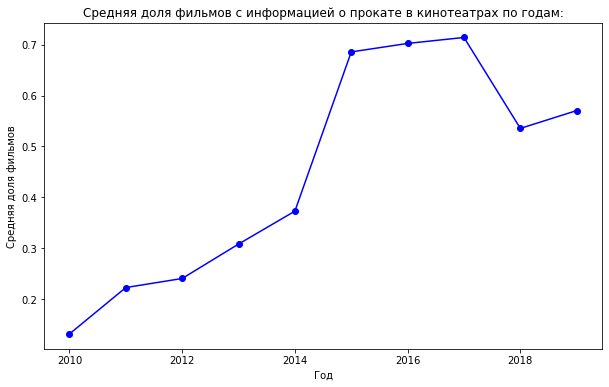

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(average_share_by_year, marker='o', linestyle='-', color='b');
plt.title('Средняя доля фильмов с информацией о прокате в кинотеатрах по годам:')
plt.xlabel('Год')
plt.ylabel('Средняя доля фильмов');

Доля данных росла до 2017, а в 2018 вновь снизилась

<a id="rental"></a> 
### Динамика проката данных по годам
- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [45]:
# Группируем по годам и вычисляем общую сумму сбора для каждого года
total_box = movies.groupby('year')['box_office'].sum()
print("\nОбщая сумма сборов по годам:")
print(total_box)

# Находим год с минимальной суммой сборов
min_box = total_box.idxmin()

print(f"\nГод с наименьшей cуммой сборой: {min_box}")

# Находим год с максимальной суммой сборов
max_box = total_box.idxmax()

print(f"\nГод с наибольшей cуммой сборой: {max_box}")


Общая сумма сборов по годам:
year
2010        2,148,764.00
2011       13,997,065.00
2012        6,842,683.00
2013       29,775,666.20
2014    7,444,140,111.20
2015   38,263,253,872.11
2016   44,932,686,064.30
2017   48,563,707,217.51
2018   49,668,403,134.32
2019   48,425,708,779.59
Name: box_office, dtype: float64

Год с наименьшей cуммой сборой: 2010

Год с наибольшей cуммой сборой: 2018


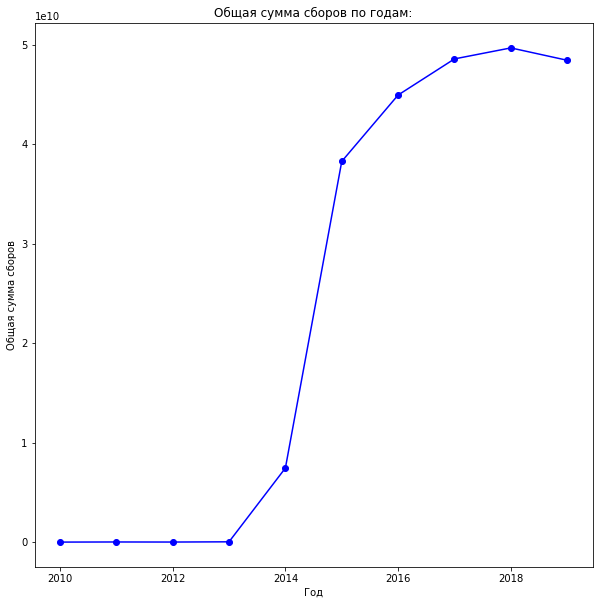

In [46]:
plt.figure(figsize=(10, 10))
plt.plot(total_box, marker='o', linestyle='-', color='b');
plt.title('Общая сумма сборов по годам:')
plt.xlabel('Год')  
plt.ylabel('Общая сумма сборов');

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

Cредняя сумма сборов по годам:
year
2010        21,274.89
2011       129,602.45
2012        54,307.01
2013       163,602.56
2014    27,069,600.40
2015    83,544,222.43
2016    86,575,503.01
2017   136,032,793.33
2018   104,565,059.23
2019    91,369,261.85
Name: box_office, dtype: float64


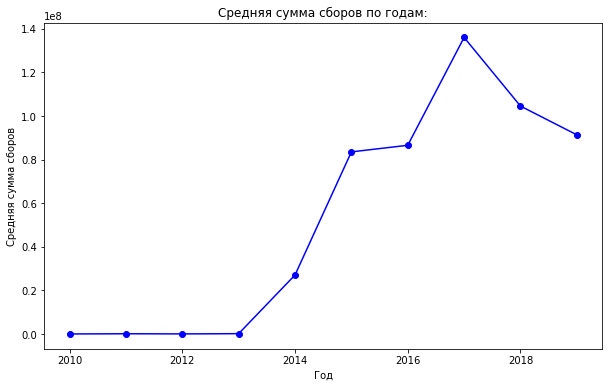

In [47]:
average_box= movies.groupby('year')['box_office'].mean()
plt.figure(figsize=(10, 6))
plt.title('Cредняя сумма сборов по годам:')
plt.xlabel('Год')  
plt.ylabel('Cредняя сумма сборов');
plt.plot(average_box, marker='o', linestyle='-', color='b');
print("Cредняя сумма сборов по годам:")
print(average_box)

Медианная сумма сборов по годам:
year
2010       1,590.00
2011       2,952.50
2012       5,260.00
2013       3,475.00
2014      18,160.00
2015   4,777,096.17
2016   3,778,317.80
2017   9,968,340.00
2018   8,891,102.21
2019   4,627,798.34
Name: box_office, dtype: float64


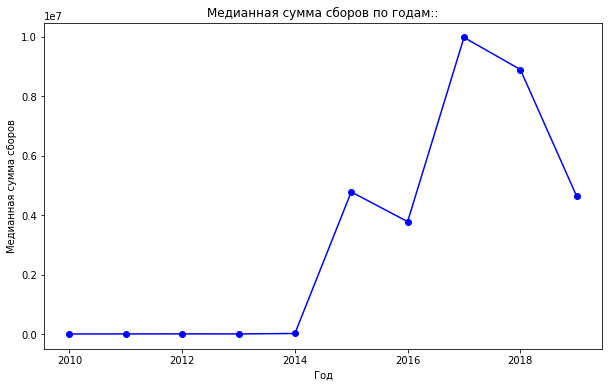

In [48]:
median_box= movies.groupby('year')['box_office'].median()
plt.figure(figsize=(10, 6))
plt.plot(median_box, marker='o', linestyle='-', color='b');
plt.title('Медианная сумма сборов по годам::')
plt.xlabel('Год')  
plt.ylabel('Медианная сумма сборов');
print("Медианная сумма сборов по годам:")
print(median_box)

При анализе медианы и среднего значения видно, что были падения в 2016 и после пика в 2017. В Медианных значениях скачки более заметны.

<a id="age"></a> 
### Возрастное ограничение аудитории и сборы в прокате
- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? 

In [49]:
movies_2015 = movies[movies['year']>2014]
grouped_data = movies_2015.groupby(['age_restriction', 'year'])['box_office'].sum()
# Преобразуем результат в сводную таблицу, чтобы столбцы age_restriction стали индексами, а годы - столбцами
pivot_table = grouped_data.reset_index().pivot_table(index='year', columns='age_restriction', values='box_office')

# Выводим полученную сводную таблицу
print(pivot_table)

age_restriction  «0+» - для любой зрительской аудитории  \
year                                                      
2015                                     273,367,887.78   
2016                                     150,228,848.67   
2017                                     229,598,930.00   
2018                                      32,449,002.11   
2019                                      17,746,066.82   

age_restriction  «12+» - для детей старше 12 лет  \
year                                               
2015                           13,616,082,008.91   
2016                           12,179,462,355.01   
2017                            7,851,427,660.67   
2018                           14,267,291,660.69   
2019                           12,680,198,773.67   

age_restriction  «16+» - для детей старше 16 лет  «18+» - запрещено для детей  \
year                                                                            
2015                           10,537,061,602.57           

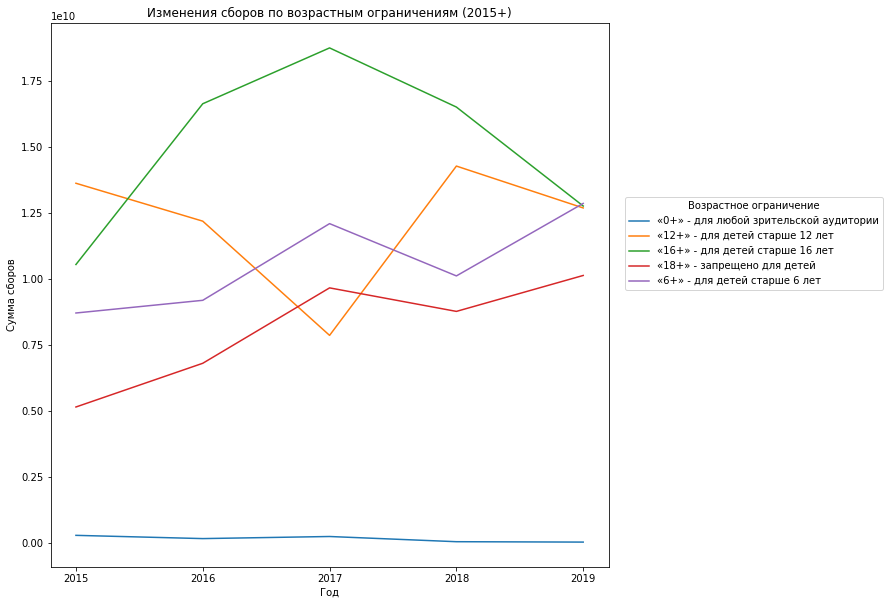

In [50]:
pivot_table.plot(kind='line', figsize=(10, 10))

# Добавление заголовка и меток осей
plt.xticks(pivot_table.index) 
plt.title('Изменения сборов по возрастным ограничениям (2015+)')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')

# Отображение легенды
plt.legend(title='Возрастное ограничение', bbox_to_anchor=(1.5, 0.5), loc='lower right')

# Отображение графика
plt.show()

Самые низкие сборы и категории «0+».
Этого не видно на графике, но видно из таблицы (эти сборы резко снизилист после 2017)
В 2017 была просадка категории 12+ но потом она вновь пошла вверх.
В 2017 был пик для категории 16+ после этого у неё был спад.
Категории 6+ и 18 + практически повторяют траекторию роста друг друга.

<a id="goverment"></a> 

## Исследование фильмов, которые получили государственную поддержку

In [51]:
goverment_support = movies_2015 [movies_2015 ['financing_source'].isna() == False]
goverment_support

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,goverment_part
3148,Я-Учитель,111019715,2015-12-02 12:00:00+00:00,Художественный,"НП Киностудия детских и юношеских фильмов ""Иль...",Россия,С.Мокрицкий,А.Ковтунец,«12+» - для детей старше 12 лет,0.00,"35,000,000.00","91,000,000.00",Министерство культуры,7.40,"мелодрама,комедия","1,550.00",2015,С.Мокрицкий,мелодрама,0.38
2526,Вдвоем на льдине.,111011015,2015-06-25 12:00:00+00:00,Художественный,"ООО ""Первое творческое объединение""",Россия,"Н.Джорджадзе, В.Игнатьев","П.Поляков, И.Букреев",«12+» - для детей старше 12 лет,0.00,"26,500,000.00","37,943,652.00",Министерство культуры,6.60,мелодрама,"4,450.00",2015,Н.Джорджадзе,мелодрама,0.70
2802,Битва с экстрасенсами,111011315,2015-07-20 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",Россия,И.Кордзаия,Е.Мелентьев,«12+» - для детей старше 12 лет,0.00,"25,900,000.00","59,560,746.00","Министерство культуры, Фонд кино",5.40,"фэнтези,приключения","6,000.00",2015,И.Кордзаия,фэнтези,0.43
3503,День До,111010916,2016-07-06 12:00:00+00:00,Художественный,"ООО ""Кинобюро"" по заказу ООО ""Среда и Ко""",Россия,"А.Котт, В.Котт, А.Карпиловский, Б.Хлебников","А.Цекало, А.Котт",«18+» - запрещено для детей,"25,000,000.00","25,000,000.00","90,822,766.00",Фонд кино,4.80,"драма,фантастика","9,000.00",2016,А.Котт,драма,0.55
2149,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30 12:00:00+00:00,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,«18+» - запрещено для детей,0.00,"25,000,000.00","37,371,262.00",Министерство культуры,NaN,Неизвестен,"19,820.00",2015,К.Сухарьков,Неизвестен,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,На Луне,111015519,2019-11-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","57,876,000.00",Министерство культуры,6.60,"приключения,триллер",NaN,2019,Е.Михалков-Кончаловский,приключения,0.60
7343,Кроличья лапа,111018919,2019-11-20 12:00:00+00:00,Художественный,"ООО ""Зебра"", ""Артемис"", ""Гринлит""","Россия, Бельгия, Финляндия",Н.Джорджадзе,Ю.Соболевская,«16+» - для детей старше 16 лет,0.00,"30,000,000.00","47,734,050.00",Министерство культуры,NaN,Неизвестен,NaN,2019,Н.Джорджадзе,Неизвестен,0.63
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.53
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,0.65


In [52]:
for name, group_data in goverment_support.groupby('age_restriction'):
    correlation = group_data['box_office'].corr(group_data['goverment_part'], method='pearson', min_periods=1)
    print(f"Корреляци для группы с {name} ограничением: {correlation}")

Корреляци для группы с «0+» - для любой зрительской аудитории ограничением: -0.9185623717033212
Корреляци для группы с «12+» - для детей старше 12 лет ограничением: -0.12415558733431836
Корреляци для группы с «16+» - для детей старше 16 лет ограничением: -0.1308315845226726
Корреляци для группы с «18+» - запрещено для детей ограничением: -0.3834725547615287
Корреляци для группы с «6+» - для детей старше 6 лет ограничением: 0.02385024841048709


In [53]:
for name, group_data in goverment_support.groupby('main_genre'):
    correlation = group_data['box_office'].corr(group_data['goverment_part'], method='pearson', min_periods=1)
    print(f"Корреляци для {name}: {correlation}")

Корреляци для Неизвестен: -0.16908055056256446
Корреляци для биография: -0.6603984315317988
Корреляци для боевик: -0.10277028425599541
Корреляци для военный: -0.5049845440976136
Корреляци для детектив: -0.5674481313019019
Корреляци для детский: -0.7835988817794186
Корреляци для драма: -0.07813755166440679
Корреляци для история: 0.8640665261271631
Корреляци для комедия: -0.26154371525687065
Корреляци для криминал: 0.011078908010587451
Корреляци для мелодрама: -0.38833572188233423
Корреляци для мультфильм: -0.14873060951728084
Корреляци для мюзикл: 0.3755228674468883
Корреляци для приключения: -0.12563499337199985
Корреляци для реальное ТВ: nan
Корреляци для семейный: 0.08592262156185733
Корреляци для спорт: 0.9602920662062306
Корреляци для триллер: 0.3061081976379268
Корреляци для ужасы: -0.5490368828723478
Корреляци для фантастика: 0.7211587348916574
Корреляци для фэнтези: -0.6195930131099697


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


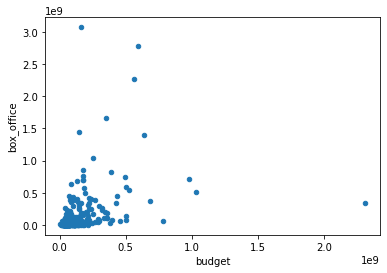

In [54]:
goverment_support.plot(x='budget', y='box_office', kind='scatter');

In [55]:
print('Коэффициент коллеряции бюджета фильма и его сборов')
goverment_support['budget'].corr(goverment_support['box_office'])

Коэффициент коллеряции бюджета фильма и его сборов


0.37297873256683106

In [56]:
def categorize_goverment(part):
    try:
        if 0 <= part <= 0.1:
            return '<10 %'
        elif 0.1 <= part <= 0.3:
            return 'от 10 до 30 %'
        elif 0.31 <= part <= 0.7:
            return 'от 30 до 70 %'
        elif 0.71 <= part <= 0.9:
            return 'от 70 до 90 %'
        elif part >= 0.91:
            return 'больше 90%'
    except:
        pass

In [57]:
goverment_support['budget_category'] = goverment_support['goverment_part'].apply(categorize_goverment)

In [58]:
for name, group_data in goverment_support.groupby('budget_category'):
    correlation = group_data['box_office'].corr(group_data['goverment_part'], method='pearson', min_periods=1)
    print(f"Корреляци для группе, где государственной поддержки {name}: {correlation}")

Корреляци для группе, где государственной поддержки <10 %: -0.7625371434460119
Корреляци для группе, где государственной поддержки больше 90%: nan
Корреляци для группе, где государственной поддержки от 10 до 30 %: 0.14563826728692666
Корреляци для группе, где государственной поддержки от 30 до 70 %: -0.12942731136849833
Корреляци для группе, где государственной поддержки от 70 до 90 %: nan


In [59]:
for name, group_data in goverment_support.groupby('budget_category'):
    correlation = group_data['box_office'].corr(group_data['budget'], method='pearson', min_periods=1)
    print(f"Корреляци для группе, где государственной поддержки {name}: {correlation}")

Корреляци для группе, где государственной поддержки <10 %: -0.077117919168641
Корреляци для группе, где государственной поддержки больше 90%: 0.6803390740824403
Корреляци для группе, где государственной поддержки от 10 до 30 %: 0.20593673071310448
Корреляци для группе, где государственной поддержки от 30 до 70 %: 0.5449842427091087
Корреляци для группе, где государственной поддержки от 70 до 90 %: nan


In [60]:
goverment_support['outcome'] = np.where(goverment_support['budget'] > goverment_support['box_office'], 'провал', 'успех')

In [61]:
def compare_outcomes(group):
    outcome_counts = group['outcome'].value_counts()
    if 'провал' in outcome_counts and 'успех' in outcome_counts:
        if outcome_counts['провал'] > outcome_counts['успех']:
            return "Больше провалов"
        elif outcome_counts['провал'] < outcome_counts['успех']:
            return "Больше успехов"
        else:
            return "Одинаковое количество провалов и успехов"
    elif 'провал' in outcome_counts:
        return "Больше провалов"
    elif 'успех' in outcome_counts:
        return "Больше успехов"
    else:
        return "Нет данных о результатах"

result = goverment_support.groupby('budget_category').apply(compare_outcomes)
print(result)

budget_category
<10 %            Больше провалов
больше 90%        Больше успехов
от 10 до 30 %    Больше провалов
от 30 до 70 %    Больше провалов
от 70 до 90 %    Больше провалов
dtype: object


Можно сделать вывод о том, что государственная поддержка работает только тогда, когда фильм полностью спонсируется государством, в обратных случаях фильмы чаще проваливаются в прокате, чем делают сборы.

По жанрам наилучшие сборы у исторических фильмов, спортивных и фантастики.

<a id="conclusion"></a> 

## Общий вывод

**1. Проанализров дубликаты по названию мы увидели, что есть много столбцов, в которых различаются***
1) Прокатные удостоверения

2) Дата премьеры фильма

3) Сборы в рублях

Один фильм может иметь несколько прокатных удостоверений, если прокатное удостоверение выдавалось в разные сроки и для разных прокатных целей. Фильм мог поменять правообладателя, название или даже быть немного изменён для каких-либо творческих или коммерческих целей. Поэтому в Минестерстве культуры стоит ввести единый идентификационный номер, которые может объединять такие фильмы, чтобы данные не дублировались при анализе.

**2. В категориальных значениях множество перечислений, поэтому достаточно сложно делать анализ про группам. Так как много вариаций, перечислений. Выделение категория главный или основной — это хороший способ проанализировать значения.

**3. Необходимо лучше проверять достоверность данных при анализе. Есть фильмы с нулевыми бюджетами, фильмы с одинаковыми прокатными удостоверениями и так далее. Источников данных много, но всё же их стоит проверять тщательнее.

**4. Данные до 2014 недостаточны для анализа** Плюс в этих периодах содержаться данные с очень странными кассовыми сборами (очень низкие). Поэтому в дальнейшей анализе используются только данные после 2015 года

**5.Анализ данных по категориям**
Самые низкие сборы и категории «0+».
Этого не видно на графике, но видно из таблицы (эти сборы резко снизилист после 2017)
В 2017 была просадка категории 12+ но потом она вновь пошла вверх.
В 2017 был пик для категории 16+ после этого у неё был спад.
Категории 6+ и 18 + практически повторяют траекторию роста друг друга.

**6. Средние и медианные значения сборов**
При анализе медианы и среднего значения видно, что были падения в 2016 и после пика в 2017. Хотя общая сумма продолжала сборов расти. В Медианных значениях скачки более заметны.

**7. Государственная поддержка**
Государственная поддержка работает только тогда, когда фильм полностью спонсируется государством, в обратных случаях фильмы чаще проваливаются в прокате, чем делают сборы.

По жанрам наилучшие сборы у исторических фильмов, спортивных и фантастики.